### Final Project
#### Part 1: Experiment Control 

In [1]:
import numpy as np
from numpy import random 
import pandas as pd
import simpleaudio as sa 
from matplotlib import pyplot as plt 

In [2]:
def make_tone(f,duration,sr = 44100,ramp = 200):
    time_vec = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate.
    tone = np.sin(f * time_vec  * 2 * np.pi)
    risingramp = np.linspace(0,1,ramp)
    descendingramp = np.linspace(1,0,ramp)
    tone[0:ramp] = tone[0:ramp]*risingramp
    tone[-ramp:] = tone[-ramp:]*descendingramp
    return tone

In [3]:
def play_sound(tone,volume = 0.05,sr = 44100):
    tone  = tone*32768 / np.max(np.abs(tone)) # scale to the range of the sound card.  
    tone = volume*tone # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM VOLUME! 
    tone  = tone.astype(np.int16) # convert to 16 bit integers. 
    play_obj = sa.play_buffer(tone , 1, 2, sr) # i created an object here. 
    play_obj.wait_done() # tells python to wait for the sound to finish before going any further.  

In [4]:
def randomize_trials(ctrials,ncond):
    trials = np.zeros(ctrials*ncond) #zzz: number of trials for each condition(ctrials) * number of conditions in the experiments, create a array w/ 6 entries
    for j in range(ncond):
        trials[j*ctrials:(j+1)*ctrials] = j*np.ones(ctrials) # an array with ntrials ones, zzz: replace the entires with 0 or 1
    shuffle = random.permutation(ctrials*ncond) # get a random order of trials, using random.premutation, zzz: shuffle 0-5, using as index
    trials = trials[shuffle] # permute trial order zzz: indexing into the array 
    return trials

In [45]:
subjid = '003'
fA = 1760
#another two frequency 880,1760
starting_difference = 0.1
num_initial_trials = 5
max_trials = 50
duration = 0.5
ncond = 2
silent_interval = 0.25 # silent interval between the two notes
sr = 44100
volume = 0.2

filename = 'Final_project_' + subjid + '.csv' #if you prefer a csv file 

In [46]:
rng = random.default_rng(seed = 3)
df = fA * starting_difference

tone_A = make_tone(fA,duration) #zzz: here we make the tone, which is the sine wave. 
fB = fA + df
tone_B = make_tone(fB,duration)
silence = np.zeros(int(silent_interval*sr))
play_sound(tone_A,volume = volume)
play_sound(tone_B,volume = volume)

In [47]:
trials = randomize_trials(25, ncond) #zzz: if use this function, how can we get 5, ncond = 2, but ctrials cannot be 2.5? 
#trials = trial_order[0:5]
#print(trials)
#print(trials)

In [48]:
frequency_A = np.zeros(max_trials)
frequency_diff = np.zeros(max_trials)
correct_response = np.zeros(max_trials) #empty array to hold the trial labels, zzz: 50 entries rn/ or we can make it 5 rn, and concatenate them later. 
trial_response = np.array(np.zeros(max_trials),dtype = 'str') #empty array to hold the responses of trype string

In [ ]:

# Run initial fixed 5 training trials
for i in range(num_initial_trials):
    trial_order = trials[i] #index into the array 
    tone_A = make_tone(fA, duration)
    tone_B = make_tone(fA+df, duration) 
    frequency_A [i] = fA  
    if trial_order == 0: 
        stimulus = np.concatenate((tone_A,silence,tone_B))
        play_sound(stimulus, volume = 0.05,sr = 44100)
        correct_response[i] = 2
        frequency_diff [i] = df
    else:
        stimulus = np.concatenate((tone_B,silence,tone_A))
        play_sound(stimulus, volume = 0.05,sr = 44100)
        correct_response[i] = 1
        frequency_diff [i] = df
    response_check = False #I set the response_check to false.  I will only change response_check if i get a valid response (1 or 2)
    while response_check == False: # This while loop runs until I get a valid response 
        response = input("Which one was higher? (1 or 2): ") 
        if (response =='1') | (response == '2'): #check if its an a or b 
            response_check = True #if it is update response_check to true 
            print(response) # print the response 
            trial_response[i] = response # the jth trial response is response
        else:
            print('Invalid Response Try Again')
print('Done!')


In [ ]:
#initializing the data 
reversal_count = 0
correct_count = 0
trial_count = 0 
test_trials= max_trials - num_initial_trials

In [ ]:
# the actual test 
for i in range(test_trials): #max_trials- num_initial_trials
    trial_order = trials[i+5] #index into the array 
    tone_A = make_tone(fA, duration) 
    tone_B = make_tone(fA+df, duration)  
    frequency_A [i+5] = fA
    frequency_diff[i+5] = df
    if trial_order == 0: 
        stimulus = np.concatenate((tone_A,silence,tone_B))
        play_sound(stimulus, volume = 0.05,sr = 44100)
        correct_response[i+5] = 2
        trial_count = trial_count +1
    else:
        stimulus = np.concatenate((tone_B,silence,tone_A))
        play_sound(stimulus, volume = 0.05,sr = 44100)
        correct_response[i+5] = 1
        trial_count = trial_count +1
    response_check = False #I set the response_check to false.  I will only change response_check if i get a valid response (1 or 2)
    while response_check == False: # This while loop runs until I get a valid response 
        response = input("Which one was higher? (1 or 2): ") 
        if (response =='1') | (response == '2'): #check if its an a or b 
            response_check = True #if it is update response_check to true 
            print(response) # print the response 
            trial_response[i+5] = response # the ith trial response is response
            if int(response) == correct_response[i+5]:
                correct_count = correct_count+1
                if correct_count == 2:
                    df = df/ np.sqrt(2)
                    correct_count = 0
            else: 
                df = df * np.sqrt(2)
                correct_count = 0 
                reversal_count = reversal_count+1
        else:
            print('Invalid Response Try Again')
    if reversal_count >= 4:
        print("The session is terminated")
        break 
print('Done!') 


In [ ]:
data = pd.DataFrame(columns = ['Condition','Frequency of A', 'Frequency Difference','Response','Correct_Response']) #create an empty data frame with three columns with column labels given
data['Condition'] = trials #place trial_order in the 'Condition' column
data['Frequency of A'] = frequency_A 
data['Frequency Difference'] = frequency_diff
data['Response'] = trial_response #place trial_response in the 'Response' column
data['Correct_Response'] = correct_response
data.to_csv(filename)

--------
#### Part 2: Graphing


In [5]:
#combine the data for subject 1
sub1_1 = pd.read_csv('Final_project_440_001.csv')
sub1_2 = pd.read_csv('Final_project_880_001.csv')
sub1_3 = pd.read_csv('Final_project_1760_001.csv')
combined_data_sub1 = pd.concat([sub1_1, sub1_2, sub1_3])

In [6]:
print(combined_data_sub1.keys())

Index(['Unnamed: 0', 'Condition', 'Frequency of A', 'Frequency Difference',
       'Response', 'Correct_Response'],
      dtype='object')


In [7]:
trial_number = np.array(combined_data_sub1 ['Unnamed: 0'])
trial_number = trial_number +1 # change x-axis to 1--150
freq_diff = np.array(combined_data_sub1 ['Frequency Difference']) #y-axis 
freq_A = np.array(combined_data_sub1 ['Frequency of A'])
resp = np.array(combined_data_sub1 ['Response'])
corr_resp = np.array(combined_data_sub1 ['Correct_Response'])

#get the trial number for each frequency 1-50
trial_number_1 = np.array(trial_number[freq_A == 440]) 
trial_number_2 = np.array(trial_number[freq_A == 880])
trial_number_3 = np.array(trial_number[freq_A == 1760])

#get the frequency difference for each frequency 
freq_diff_1 = np.array(freq_diff[freq_A == 440])
freq_diff_2 = np.array(freq_diff[freq_A == 880])
freq_diff_3 = np.array(freq_diff[freq_A == 1760])

#get the response for each frequency 
resp_1= np.array(resp[freq_A == 440])
resp_2= np.array(resp[freq_A == 880])
resp_3= np.array(resp[freq_A == 1760])

#get the correct response for each frequency
corr_resp_1= np.array(corr_resp[freq_A == 440])
corr_resp_2= np.array(corr_resp[freq_A == 880])
corr_resp_3= np.array(corr_resp[freq_A == 1760])

#intial 5 trials for each frequency 
testing_1 = trial_number_1[0:5]
testing_2 = trial_number_2[0:5]
testing_3 = trial_number_3[0:5]

# the x position of incorrect answers for each frequency 
incorrect_1= np.array(trial_number_1[resp_1 != corr_resp_1])
incorrect_2= np.array(trial_number_2[resp_2 != corr_resp_2])
incorrect_3= np.array(trial_number_3[resp_3 != corr_resp_3])


#corresponding incorrect df 
incorrect_df_1 = np.array(freq_diff_1[incorrect_1-1])
incorrect_df_2 = np.array(freq_diff_2[incorrect_2-1])
incorrect_df_3 = np.array(freq_diff_3[incorrect_3-1])#need to -1 here, because I made trial_number= trial_number +1 to change to 1--150 in the first step




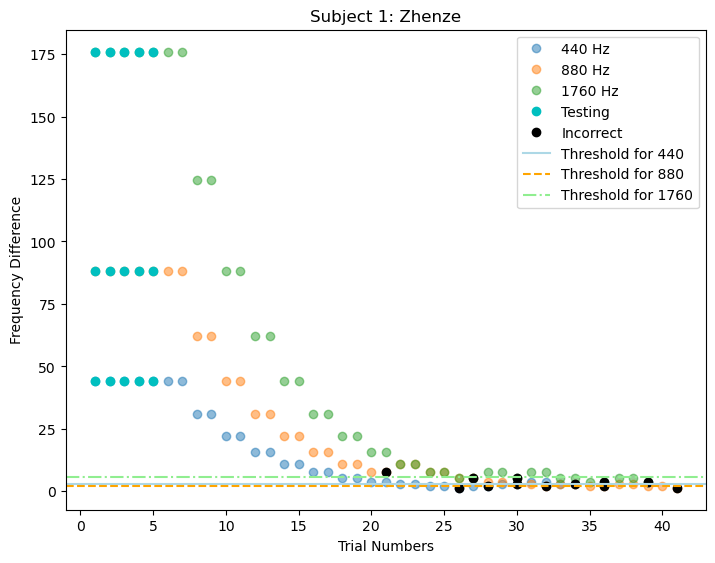

In [8]:
### for subject 1: zhenze 

fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
ax.plot(trial_number_1, freq_diff_1, 'o', alpha=0.5, label= "440 Hz") 
ax.plot(trial_number_2, freq_diff_2, 'o', alpha=0.5, label= "880 Hz") 
ax.plot(trial_number_3, freq_diff_3, 'o', alpha=0.5, label= "1760 Hz") 

#change the color for testing trials 
ax.plot(testing_1, freq_diff_1[0:5], 'co', label = "Testing")
ax.plot(testing_2, freq_diff_2[0:5], 'co')
ax.plot(testing_3, freq_diff_3[0:5], 'co')

#change the color for incorrect answers 
ax.plot(incorrect_1, incorrect_df_1, 'ko', label = 'Incorrect')
ax.plot(incorrect_2, incorrect_df_2, 'ko')
ax.plot(incorrect_3, incorrect_df_3, 'ko')

#add labels 
ax.set_title("Subject 1: Zhenze")
ax.set_xlabel("Trial Numbers")
ax.set_ylabel("Frequency Difference")

# compute the threshold
threshold_1 = np.mean(freq_diff_1[27:33]) #also need to -1 
threshold_2 = np.mean(freq_diff_2[31:40])
threshold_3 = np.mean(freq_diff_3[29:38])

#add the threshold 
ax.axhline(threshold_1, color='lightblue', linestyle='-', label='Threshold for 440')
ax.axhline(threshold_2, color='orange', linestyle='--', label='Threshold for 880' )
ax.axhline(threshold_3, color='lightgreen', linestyle='-.', label='Threshold for 1760')
ax.legend()
plt.show()

Text(0, 0.5, 'Threshold')

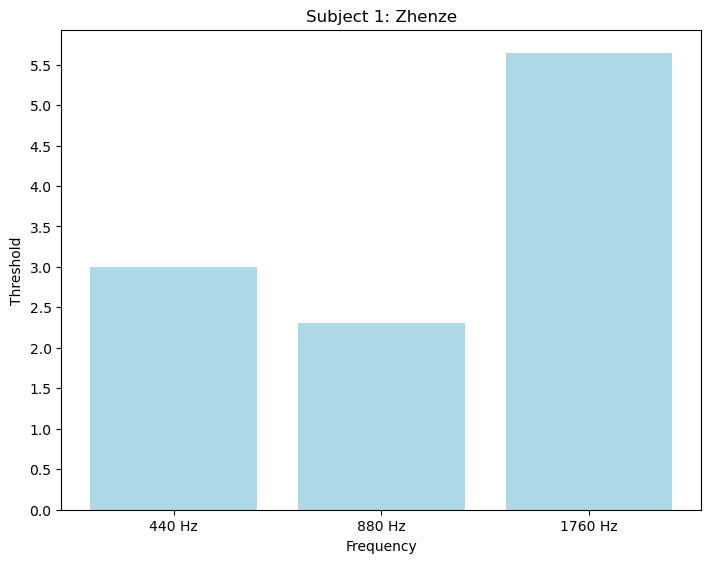

In [9]:
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
#create an x axis
Frequency = ['440 Hz', '880 Hz', '1760 Hz']
Threshold = [threshold_1 , threshold_2, threshold_3]
ax.bar(Frequency, Threshold, color = 'lightblue')
ytick_location = np.arange(0, 6, 0.5)#add a tick 
ax.set_yticks(ytick_location)
ax.set_title("Subject 1: Zhenze")
ax.set_xlabel('Frequency')
ax.set_ylabel('Threshold')

### Subject 2: Teffina Zhu Zheng


In [10]:
#combine the data for subject 2
sub2_1 = pd.read_csv('Final_project_440_002.csv')
sub2_2 = pd.read_csv('Final_project_880_002.csv')
sub2_3 = pd.read_csv('Final_project_1760_002.csv')
combined_data_sub2 = pd.concat([sub2_1, sub2_2, sub2_3])
print(combined_data_sub2.keys())

Index(['Unnamed: 0', 'Condition', 'Frequency of A', 'Frequency Difference',
       'Response', 'Correct_Response'],
      dtype='object')


In [11]:
trial_number_002 = np.array(combined_data_sub2 ['Unnamed: 0'])
trial_number_002 = trial_number_002 +1 # change x-axis to 1--150
freq_diff_002 = np.array(combined_data_sub2 ['Frequency Difference']) #y-axis 
freq_A_002 = np.array(combined_data_sub2['Frequency of A'])
resp_002 = np.array(combined_data_sub2 ['Response'])
corr_resp_002 = np.array(combined_data_sub2 ['Correct_Response'])

#get the trial number for each frequency 1-50
trial_number_1_002 = np.array(trial_number_002[freq_A_002 == 440]) 
trial_number_2_002 = np.array(trial_number_002[freq_A_002 == 880])
trial_number_3_002 = np.array(trial_number_002[freq_A_002 == 1760])

#get the frequency difference for each frequency 
freq_diff_1_002 = np.array(freq_diff_002[freq_A_002 == 440])
freq_diff_2_002 = np.array(freq_diff_002[freq_A_002 == 880])
freq_diff_3_002 = np.array(freq_diff_002[freq_A_002== 1760])

#get the response for each frequency 
resp_1_002= np.array(resp_002[freq_A_002 == 440])
resp_2_002= np.array(resp_002[freq_A_002 == 880])
resp_3_002= np.array(resp_002[freq_A_002 == 1760])

#get the correct response for each frequency
corr_resp_1_002= np.array(corr_resp_002[freq_A_002 == 440])
corr_resp_2_002= np.array(corr_resp_002[freq_A_002 == 880])
corr_resp_3_002= np.array(corr_resp_002[freq_A_002 == 1760])

#intial 5 trials for each frequency 
testing_1_002 = trial_number_1_002[0:5]
testing_2_002 = trial_number_2_002[0:5]
testing_3_002 = trial_number_3_002[0:5]

# the x position of incorrect answers for each frequency 
incorrect_1_002= np.array(trial_number_1_002[resp_1_002 != corr_resp_1_002])
incorrect_2_002= np.array(trial_number_2_002[resp_2_002 != corr_resp_2_002])
incorrect_3_002= np.array(trial_number_3_002[resp_3_002 != corr_resp_3_002])


#corresponding incorrect df 
incorrect_df_1_002 = np.array(freq_diff_1_002[incorrect_1_002-1])
incorrect_df_2_002 = np.array(freq_diff_2_002[incorrect_2_002-1])
incorrect_df_3_002 = np.array(freq_diff_3_002[incorrect_3_002-1])

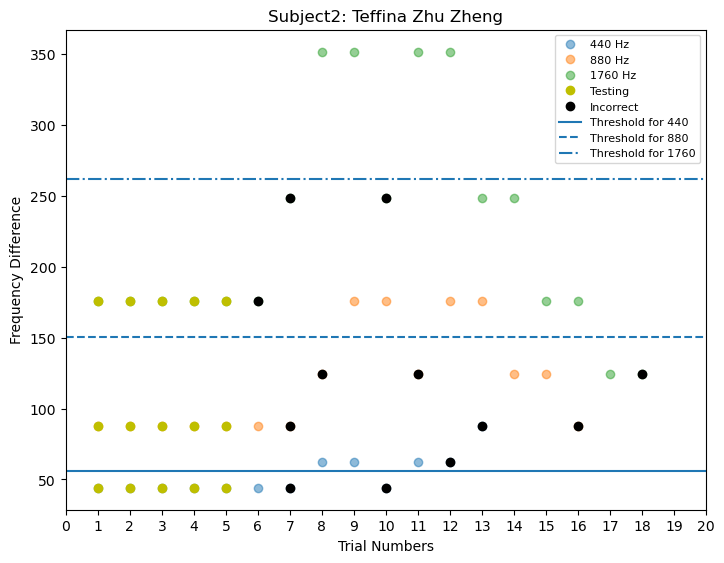

In [13]:
### for subject 2: Teffina Zhu Zheng 

fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
ax.plot(trial_number_1_002, freq_diff_1_002, 'o', alpha=0.5, label= "440 Hz") 
ax.plot(trial_number_2_002, freq_diff_2_002, 'o', alpha=0.5, label= "880 Hz") 
ax.plot(trial_number_3_002, freq_diff_3_002, 'o', alpha=0.5, label= "1760 Hz") 

#change the color for testing trials 
ax.plot(testing_1_002, freq_diff_1_002[0:5], 'yo', label = "Testing")
ax.plot(testing_2_002, freq_diff_2_002[0:5], 'yo')
ax.plot(testing_3_002, freq_diff_3_002[0:5], 'yo')

#change the color for incorrect answers 
ax.plot(incorrect_1_002, incorrect_df_1_002, 'ko', label = 'Incorrect')
ax.plot(incorrect_2_002, incorrect_df_2_002, 'ko')
ax.plot(incorrect_3_002, incorrect_df_3_002, 'ko')

#add labels 
ax.set_title("Subject2: Teffina Zhu Zheng")
ax.set_xlabel("Trial Numbers")
ax.set_ylabel("Frequency Difference")

# compute the threshold
threshold_1_002 = np.mean(freq_diff_1_002[9:12]) 
threshold_2_002 = np.mean(freq_diff_2_002[7:15])
threshold_3_002 = np.mean(freq_diff_3_002[6:17])

#add the threshold 
ax.axhline(threshold_1_002,  linestyle='-' , label='Threshold for 440')
ax.axhline(threshold_2_002,  linestyle='--', label='Threshold for 880')
ax.axhline(threshold_3_002, linestyle='-.', label='Threshold for 1760')
xtick_location = np.arange(0,21,1)
ax.set_xticks(xtick_location)
ax.legend(loc = 'upper right', fontsize = 8)
plt.show()

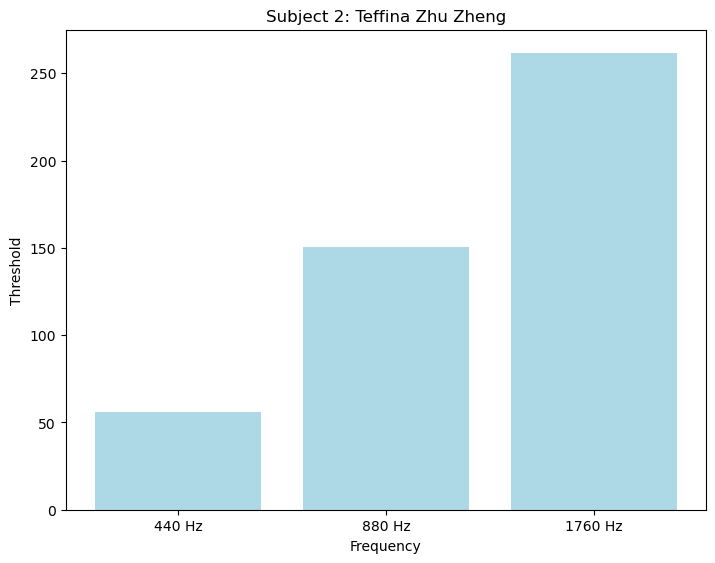

In [20]:
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
#create an x axis
Frequency = ['440 Hz', '880 Hz', '1760 Hz']
Threshold = [threshold_1_002 , threshold_2_002, threshold_3_002]
ax.bar(Frequency, Threshold, color = 'lightblue')
#ytick_location = np.arange(0, 10, 0.5)#add a tick 
#ax.set_yticks(ytick_location)

ax.set_title("Subject 2: Teffina Zhu Zheng")
ax.set_xlabel('Frequency')
ax.set_ylabel('Threshold')
plt.show()

### Subject 3: Boyoon

In [15]:
#combine the data for subject 1
sub3_1 = pd.read_csv('Final_project_440_003.csv')
sub3_2 = pd.read_csv('Final_project_880_003.csv')
sub3_3 = pd.read_csv('Final_project_1760_003.csv')
combined_data_sub3 = pd.concat([sub3_1, sub3_2, sub3_3])
print(combined_data_sub3.keys())

Index(['Unnamed: 0', 'Condition', 'Frequency of A', 'Frequency Difference',
       'Response', 'Correct_Response'],
      dtype='object')


In [17]:
trial_number_003 = np.array(combined_data_sub3 ['Unnamed: 0'])
trial_number_003 = trial_number_003 +1 # change x-axis to 1--150
freq_diff_003 = np.array(combined_data_sub3 ['Frequency Difference']) #y-axis 
freq_A_003 = np.array(combined_data_sub3['Frequency of A'])
resp_003 = np.array(combined_data_sub3 ['Response'])
corr_resp_003 = np.array(combined_data_sub3 ['Correct_Response'])

#get the trial number for each frequency 1-50
trial_number_1_003 = np.array(trial_number_003[freq_A_003 == 440]) 
trial_number_2_003 = np.array(trial_number_003[freq_A_003 == 880])
trial_number_3_003 = np.array(trial_number_003[freq_A_003 == 1760])

#get the frequency difference for each frequency 
freq_diff_1_003 = np.array(freq_diff_003[freq_A_003 == 440])
freq_diff_2_003 = np.array(freq_diff_003[freq_A_003 == 880])
freq_diff_3_003 = np.array(freq_diff_003[freq_A_003== 1760])

#get the response for each frequency 
resp_1_003= np.array(resp_003[freq_A_003 == 440])
resp_2_003= np.array(resp_003[freq_A_003 == 880])
resp_3_003= np.array(resp_003[freq_A_003== 1760])

#get the correct response for each frequency
corr_resp_1_003= np.array(corr_resp_003[freq_A_003 == 440])
corr_resp_2_003= np.array(corr_resp_003[freq_A_003 == 880])
corr_resp_3_003= np.array(corr_resp_003[freq_A_003 == 1760])

#intial 5 trials for each frequency 
testing_1_003 = trial_number_1_003[0:5]
testing_2_003 = trial_number_2_003[0:5]
testing_3_003 = trial_number_3_003[0:5]

# the x position of incorrect answers for each frequency 
incorrect_1_003= np.array(trial_number_1_003[resp_1_003 != corr_resp_1_003])
incorrect_2_003= np.array(trial_number_2_003[resp_2_003 != corr_resp_2_003])
incorrect_3_003= np.array(trial_number_3_003[resp_3_003 != corr_resp_3_003])


#corresponding incorrect df 
incorrect_df_1_003 = np.array(freq_diff_1_003[incorrect_1_003-1])
incorrect_df_2_003 = np.array(freq_diff_2_003[incorrect_2_003-1])
incorrect_df_3_003 = np.array(freq_diff_3_003[incorrect_3_003-1])

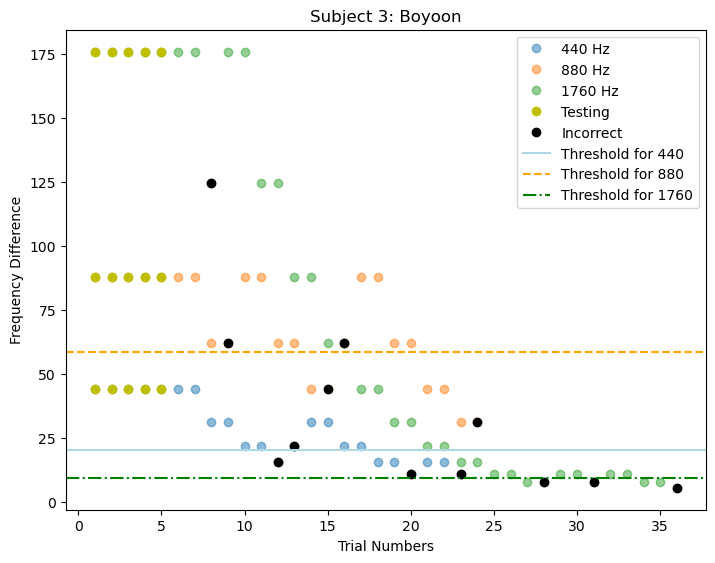

In [18]:
### for subject 3: Boyoon 

fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
ax.plot(trial_number_1_003, freq_diff_1_003, 'o', alpha=0.5, label= "440 Hz") 
ax.plot(trial_number_2_003, freq_diff_2_003, 'o', alpha=0.5, label= "880 Hz") 
ax.plot(trial_number_3_003, freq_diff_3_003, 'o', alpha=0.5, label= "1760 Hz") 

#change the color for testing trials 
ax.plot(testing_1_003, freq_diff_1_003[0:5], 'yo', label = "Testing")
ax.plot(testing_2_003, freq_diff_2_003[0:5], 'yo')
ax.plot(testing_3_003, freq_diff_3_003[0:5], 'yo')

#change the color for incorrect answers 
ax.plot(incorrect_1_003, incorrect_df_1_003, 'ko', label = 'Incorrect')
ax.plot(incorrect_2_003, incorrect_df_2_003, 'ko')
ax.plot(incorrect_3_003, incorrect_df_3_003, 'ko')

#add labels 
ax.set_title("Subject 3: Boyoon")
ax.set_xlabel("Trial Numbers")
ax.set_ylabel("Frequency Difference")

# compute the threshold
threshold_1_003 = np.mean(freq_diff_1_003[12:22]) 
threshold_2_003 = np.mean(freq_diff_2_003[14:23])
threshold_3_003 = np.mean(freq_diff_3_003[27:35])

#add the threshold 
ax.axhline(threshold_1_003, color = 'lightblue', linestyle='-' , label='Threshold for 440')
ax.axhline(threshold_2_003, color = 'orange', linestyle='--', label='Threshold for 880')
ax.axhline(threshold_3_003, color = 'green', linestyle='-.', label='Threshold for 1760')
ax.legend()
plt.show()

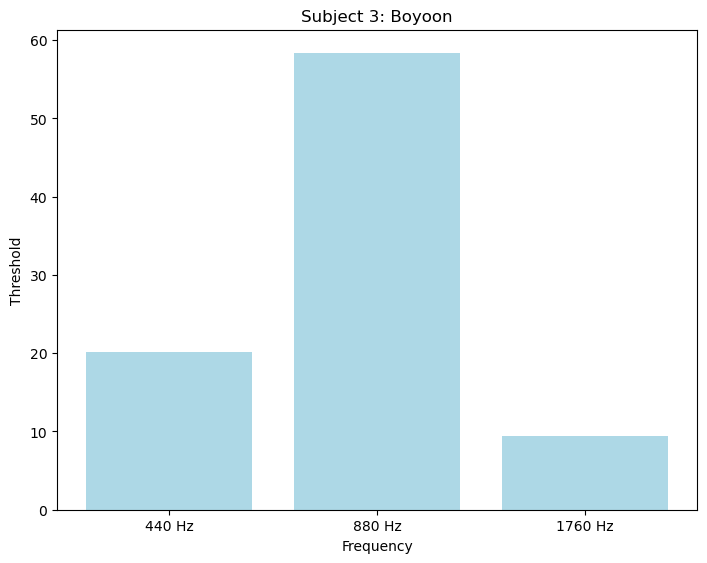

In [19]:
fig = plt.figure()
ax = fig.add_axes ([0,0,1,1])
#create an x axis
Frequency = ['440 Hz', '880 Hz', '1760 Hz']
Threshold = [threshold_1_003 , threshold_2_003, threshold_3_003]
ax.bar(Frequency, Threshold, color = 'lightblue')
#ytick_location = np.arange(0, 10, 0.5)#add a tick 
#ax.set_yticks(ytick_location)

ax.set_title("Subject 3: Boyoon")
ax.set_xlabel('Frequency')
ax.set_ylabel('Threshold')
plt.show()